In [1]:
import v1_bmtk_simulate 
import pandas as pd
import h5py
import seaborn as sns


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Apr  7 2025 08:14:35

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
def spikes_dataf(spikes_h5):
    with h5py.File(spikes_h5) as sfx:
        sfspikes = sfx['/spikes/v1']
        snodes = sfspikes['node_ids']
        stimes = sfspikes['timestamps']
        return pd.DataFrame(data={
            'node_id':snodes[:snodes.len()],
            'timestamp':stimes[:stimes.len()]
        })
    return None


def nodes_dataf(nodes_h5):
    with h5py.File(nodes_h5) as vifx:
        ntypes = vifx['/nodes/v1/node_type_id']
        nyes = vifx['/nodes/v1/0/y']
        nids = vifx['/nodes/v1/node_id']
        return pd.DataFrame(data={
            'node_id':nids[:nids.len()],
            'y':nyes[:nyes.len()],
            'node_type_id': ntypes[:ntypes.len()]
        })

def lgn_dataf(lgn_h5):
    with h5py.File(lgn_h5) as lfx:
        ltimes = lfx['spikes/timestamps']
        lgids = lfx['spikes/gids']
        return pd.DataFrame(data={
            'gid':lgids[:lgids.len()],
            'time':ltimes[:ltimes.len()]
        })


def node_types_dataf(nodes_types_csv):
    ntypesdf = pd.read_csv(nodes_types_csv, sep=' ')
    ntypesdf['layer'] = ntypesdf['pop_name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.split(',').str[0]
    ntypesdf['cell_type'] = ntypesdf['pop_name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.split(',').str[-1]
    return ntypesdf[['node_type_id', 'ei', 'location','pop_name', 'layer', 'cell_type']]
    
    

In [3]:
v1_bmtk_simulate.main("./model_builds/v1030/config.json", 16)

2025-05-30 13:40:55,548 [INFO] Created log file
2025-05-30 13:40:55,999 [INFO] Batch processing nodes for v1/0.
2025-05-30 13:40:56,107 [INFO] Batch processing nodes for lgn/0.
2025-05-30 13:40:56,118 [INFO] Batch processing nodes for bkg/0.
2025-05-30 13:40:57,227 [INFO] Setting up output directory
2025-05-30 13:40:57,230 [INFO] Building cells.
2025-05-30 13:40:58,932 [INFO] Building recurrent connections
2025-05-30 13:41:11,438 [INFO] Network created.
2025-05-30 13:41:11,442 [INFO] Build virtual cell stimulations for LGN_spikes
2025-05-30 13:41:48,244 [INFO] Build virtual cell stimulations for BKG_spikes
2025-05-30 13:41:49,981 [INFO] Starting Simulation
2025-05-30 13:42:05,705 [INFO] Simulation finished, finalizing results.
2025-05-30 13:42:08,042 [INFO] Done.


In [4]:
lgndf = lgn_dataf("./model_lgn/full3_GScorrected_PScorrected_3.0sec_SF0.04_TF2.0_ori270.0_c100.0_gs0.5_spikes.trial_0.h5")
lgndf

,gid,time
0,0,677.465750
1,0,706.951454
2,0,716.273214
3,0,759.103046
4,0,809.736841
...,...,...
337641,17399,2711.425680
337642,17399,2723.924696
337643,17399,2733.776178
337644,17399,2799.512497


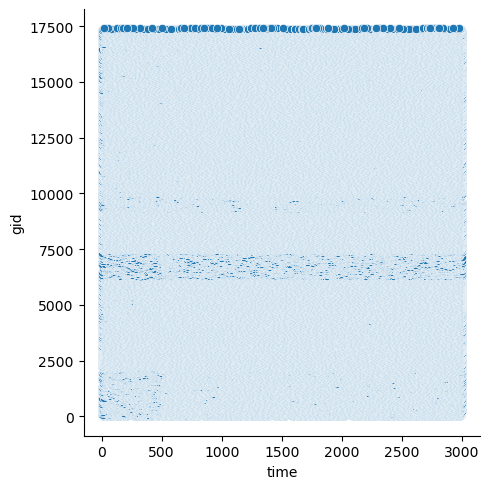

In [5]:
sns.relplot(data=lgndf, x="time", y="gid")

In [6]:
spikes_df = spikes_dataf("./model_builds/v1030/v1/output/spikes.h5")
nodes_df = nodes_dataf("./model_builds/v1030/v1/network/v1_nodes.h5")
node_types_df = node_types_dataf("./model_builds/v1030/v1/network/v1_node_types.csv")

In [7]:
node_spikes_df = pd.merge(pd.merge(spikes_df, nodes_df), node_types_df)
node_spikes_df

,node_id,timestamp,y,node_type_id,ei,location,pop_name,layer,cell_type
0,862,1567.00,-99.929362,475585413,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
1,862,1581.50,-99.929362,475585413,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
2,697,979.50,-109.814925,475585413,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
3,697,322.00,-109.814925,475585413,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
4,697,1696.75,-109.814925,475585413,i,VISp1,"('1', 'Htr3a')",'1','Htr3a'
...,...,...,...,...,...,...,...,...,...
311480,26239,1834.50,-750.643819,501566512,e,VISp6,"('6', 'Ntsr1')",'6','Ntsr1'
311481,23071,1398.50,-641.745436,592819166,i,VISp5,"('5', 'Vip')",'5','Vip'
311482,20846,2746.00,-645.830280,486110216,e,VISp5,"('5', 'IT')",'5','IT'
311483,20846,2286.75,-645.830280,486110216,e,VISp5,"('5', 'IT')",'5','IT'


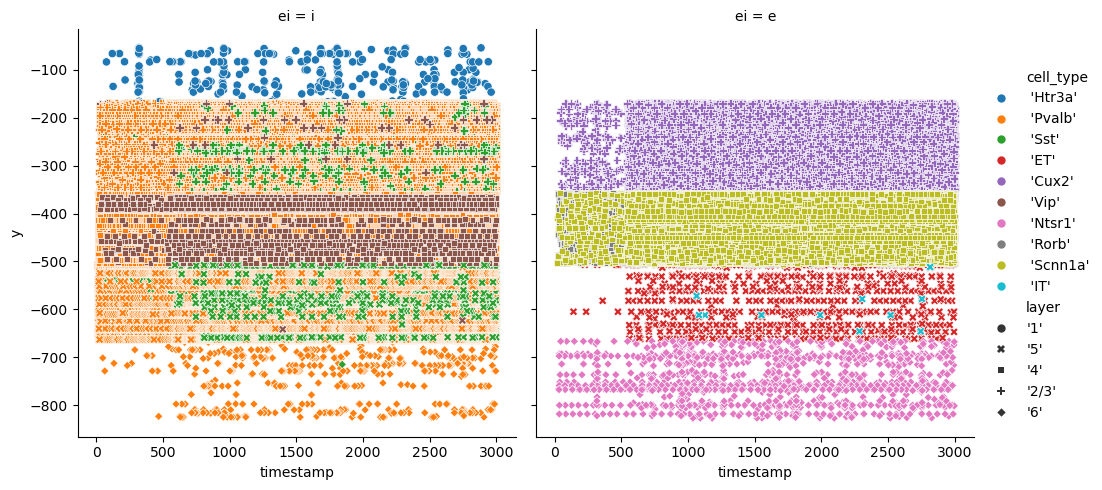

In [8]:
sns.relplot(data=node_spikes_df, x="timestamp", y="y", col="ei", hue="cell_type", style="layer")